<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/probabilistic_programming_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is probability?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()


print('Numpy:', np.__version__)

Numpy: 1.16.5


### Learning Objectives

- To have an understanding of what "probability" means, if both Bayesian and Frequentist terms.

- To be able to simulate probability dristriburion that model real-world phenomena.

- To understand Bayes' Theorem and its utility.

Let's say that a website has a CRT of 50%, i.e. that 50% of people click through. If we picked 1,000 people at random from the population, how likely would it be to find that certain number of people click?

- We can simulate this using numpy's random number generatior. To do so, first note se can use np.random.rand() to randomly select floats between 0 and 1 (known as uniform distribution). Below, we do so and plot a histogram.

(array([112.,  99., 109.,  99.,  97.,  84., 110.,  92.,  95., 103.]),
 array([1.20429188e-07, 9.99445907e-02, 1.99889061e-01, 2.99833531e-01,
        3.99778002e-01, 4.99722472e-01, 5.99666942e-01, 6.99611412e-01,
        7.99555883e-01, 8.99500353e-01, 9.99444823e-01]),
 <a list of 10 Patch objects>)

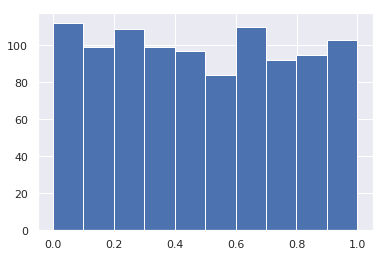

In [0]:
# Draw 1,000 samples from uniform & plot results

x = np.random.rand(1000)
plt.hist(x)

To then simulate the sampling from the population, we check wheter each float was greater or less than 0.5. If lesss than or equal to 0.5, we say the person clicked.


In [0]:
# computer how many people clicked

clicks = x < 0.5
n_clicks = sum(clicks)
f"number of clicks = {n_clicks}"

'number of clicks = 516'

The proportion of people who clicked can be calculated as teh total number of clicks over the number of people,

In [0]:
f"Proportion who clicked = {n_clicks / len(x)}"

'Proportion who clicked = 0.516'

In [0]:
# Compute the number of clicks and proportiion

clicks = x < 0.7
n_clicks = sum(clicks)
print('clicks type:', type(clicks))
print('clicks head: ', clicks[:3])
print(f"number of clicks = {n_clicks}")
print(f"Proportion who clicked = {n_clicks / len(x)}")

clicks type: <class 'numpy.ndarray'>
clicks head:  [ True  True  True]
number of clicks = 710
Proportion who clicked = 0.71


### Galapagos finch beacks

In [2]:
df_12 = pd.read_csv('https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/geospiza-scandens-beak-evolution/finch_beaks_2012.csv')
print(df_12.info())
df_12.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
band       248 non-null int64
species    248 non-null object
blength    248 non-null float64
bdepth     248 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB
None


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5


In [0]:
# store lengths in a panda series

In [0]:
lengths = df_12['blength']
print(type(lengths))
lengths.head(3)

<class 'pandas.core.series.Series'>


0    10.0
1    12.5
2     9.3
Name: blength, dtype: float64

In [0]:
# What proportion of birds have a beak lenght > 10?

p =  sum(lengths > 10) / len(lengths) 
p

0.8508064516129032

### A proxy for probability

As stated above, we have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples (with replacement) from data seeing how many lengths are > 10 and calculating the proportion.

In [0]:
n_samples = 10000
proxy_sum = sum(np.random.choice(lengths, n_samples, replace=True) > 10) / n_samples
proxy_sum

0.847

### Binomial distribution

In [0]:
# set seed
np.random.seed(16071982)

# simulate one run of flipping  the biased coin 10 times
np.random.binomial(10, 0.7)

7

### Simulating many times to get the distribution

(array([1.36200667e-04, 1.44510708e-03, 9.05084435e-03, 3.67392800e-02,
        1.02848804e-01, 2.00257781e-01, 2.66810607e-01, 2.33384244e-01,
        1.49327132e-01]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

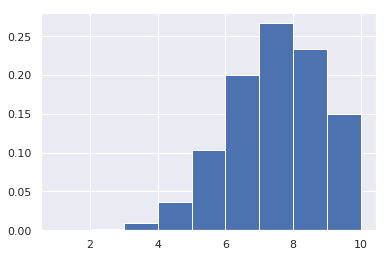

In [0]:
# simulate 1,000 run of flipping the biased coin 10 times
# x = [np.random.binomial(10, 0.7) for _ in range(1000)]
x = np.random.binomial(10, 0.7, 10000000)

# plot normalized histogram of results
plt.hist(x, density=True, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

If I flip a biased coin (P(H)=0.3) 20 times, what it the probability of 5 or mode heads?

In [0]:
experiments = np.random.binomial(20, 0.3, 10000)
sum(experiments >= 5)

7693

If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [0]:
experiments = np.random.binomial(20, 0.5, 10000)
print(experiments[:5])
sum(experiments >= 5) / 10000

[11  8 13 12 15]


0.994

Plot the normalized histogram of number of heads of the following experiment: flipping a fair coid 10 times

In [0]:
experiments = np.random.binomial(10, 0.5, 10000)

(array([0.0006, 0.0099, 0.0434, 0.1156, 0.1994, 0.2479, 0.2059, 0.1199,
        0.0469, 0.0105]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

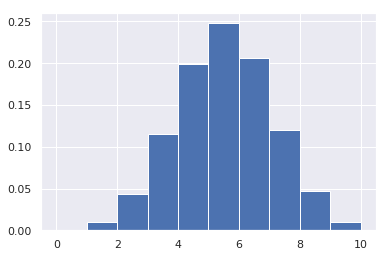

In [0]:
plt.hist(x=experiments, density=True, bins=10)

### Joint Probability & conditional probability

[1 1 1 2 0]
0.241


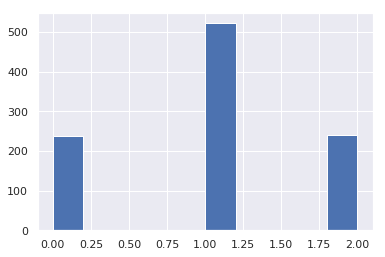

In [0]:
# calculate P(A, B)
x_0 = np.random.binomial(2, 0.5, 1000)
print(x_0[:5])
p_ab = sum(x_0 == 2) / len(x_0)
plt.hist(x_0)
print(p_ab)

In [0]:
# calculate P(A)P(B)

x_1 = np.random.binomial(1, 0.5, 10000)
x_2 = np.random.binomial(1, 0.5, 10000)

p_a = sum(x_1) / len(x_1)
p_b = sum(x_2) / len(x_2)

p_a * p_b

0.25550816

### Conditional Probability

In [0]:
df_fortis = df_12.loc[df_12['species'] == 'fortis']
print(df_fortis.head(3))
b = sum(df_fortis['blength'] > 10) / len(df_fortis)
b

NameError: ignored

In [0]:
beak_length_gt_10 = df_12['blength'] > 10
p_beak_length_gt_10 = sum(beak_length_gt_10) / len(df_12)
p_beak_length_gt_10

0.8508064516129032

In [0]:
df_scandens = df_12.loc[df_12['species'] == 'scandens']
print(df_scandens.head(5))
b = sum(df_scandens['blength'] > 10) / len(df_scandens)
b

      band   species  blength  bdepth
121  19026  scandens     14.3     9.4
122  19028  scandens     12.5     8.9
123  19029  scandens     13.7     9.5
124  19094  scandens     13.8    11.0
125  19122  scandens     12.0     8.7


1.0

## 3. Joint Probability & Conditional Probability

### Joint Probability

P(A, B) is the probability of two events A and B both occurring. i.e. Tow heads in a row.

If A and B are independent, then P(A, B) = P(A)P(B)


**JOINT PROBABILITY COIN FLIPPING**

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by

first simulating two coins being flipped together and calculating the proportion of occurences with two heads;
then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.
Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation

0.2443


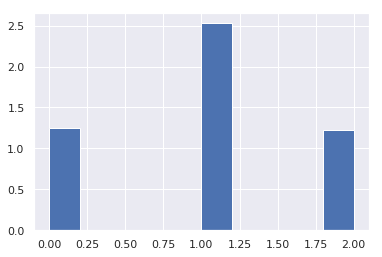

In [0]:
# Calculate P(A,B)
# Generate data of 2 coins flipped together 10,000 times
x_0 = np.random.binomial(2, 0.5, 10000) 
p_ab = sum(x_0 == 2) / len(x_0)
# Plot histogram of results
plt.hist(x_0, density=True)
print(p_ab)

In [0]:
# Calculate P(A)P(B)
x_1 = np.random.binomial(1,0.5,10000)
x_2 = np.random.binomial(1,0.5,10000)
p_a = sum(x_1) / len(x_1)
p_b = sum(x_2) / len(x_2)
p_a*p_b

0.24324624000000003

Note: In order to use such simulation and hacker statistics approaches to "prove" results such as the above, we're gliding over several coupled and deep technicalities. This is in the interests of the pedagogical nature of this introduction. For the sake of completeness, we'll mention that we're essentially

Using the proportion in our simulations as a proxy for the probability which is useful to allow you to start getting your hands dirty with probability via simluation.
Having stated this, for ease of instruction, we'll continue to do so when thinking about joint & conditional probabilities of both simulated and real data.

**Conditional Probability**

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth < 10, knowing that the finch of of species 'fortis'?"

Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [0]:
# p(a) -> beak_depth_gt_10
p_a = sum(df_12['blength'] > 10) / len(df_12)

# p(b) -> fink is a 'fortis' (SUBSET)
df_fortis = df_12.loc[df_12['species'] == 'fortis']
p_fortis = len(df_fortis) / len(df_12)

sum(df_fortis['blength'] > 10) / len(df_fortis )


0.6942148760330579

#### Joint and conditional probabilities

Conditional and joint probabilites are related by the following:$$ P(A,B) = P(A|B)P(B)$$

#### Case: Drug Testing


Question: Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this drug testing example.

Before doing so, what do you think the answer to the question "What is the probability that a randomly selected individual with a positive test is a drug user?" is? Write down your guess.

In [0]:

# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n, p=0.005)
non_users = n - users

print('users', users)
print('non users', non_users)

users 488
non users 99512


In [0]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users, 0.99)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(users, 0.01)

print('u_pos:', u_pos)
print('non_pos:', non_pos)


u_pos: 480
non_pos: 4
